In [1]:
import sys
sys.path.append("./keras/classification/")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  
from keras.preprocessing.image import ImageDataGenerator
from Models_MNV2 import model_version_mb2
from log_visualization_tool import visual_train
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:

def cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen", 
                    epoch=300, 
                    save_model_name = 'pc_book_phone_0904.h5',
                    model_summary="True",
                    weights = None):
    
    model = model_version_mb2()
    if weights is not None:
        model.load_weights(weights)
        
    test_data_path = data_path + "val"
    train_data_path = data_path + "train"
    validation_datagen = ImageDataGenerator(rescale=1. / 255)
    training_datagen = ImageDataGenerator(rescale=1. / 255,
                                          rotation_range=40, # 旋转范围
                                          width_shift_range=0.2, # 宽平移
                                          height_shift_range=0.2,# 高平移
                                          shear_range=0.2, # 剪切
                                          zoom_range=0.2, # 缩放
                                          horizontal_flip=True,
                                          fill_mode='nearest')
    
    training_generator = training_datagen.flow_from_directory(train_data_path,
                                                              target_size=(120, 160),
                                                              color_mode="grayscale",
                                                              class_mode='categorical')

    validation_generator = validation_datagen.flow_from_directory(test_data_path,
                                                                  target_size=(120, 160),
                                                                  color_mode="grayscale",
                                                                  class_mode='categorical')
    print(validation_generator.class_indices)

    # 使用 ReduceLROnPlateau 回调函数
    adam = Adam(lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #======== 模型训练 =========
    history = model.fit(
        training_generator,
        epochs = epoch,
        validation_data = validation_generator,
        callbacks=[reduce_lr, early_stopping]
    )

    model.save(save_model_name) # model 保存

    return history

Found 5545 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Epoch 1/300
174/174 [==============================] - 95s 532ms/step - loss: 0.3990 - accuracy: 0.7767 - val_loss: 2.0732 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/300
174/174 [==============================] - 92s 529ms/step - loss: 0.2025 - accuracy: 0.8938 - val_loss: 2.6223 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/300
174/174 [==============================] - 92s 527ms/step - loss: 0.1647 - accuracy: 0.9142 - val_loss: 2.1234 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/300
174/174 [==============================] - 92s 526ms/step - loss: 0.1337 - accuracy: 0.9326 - val_loss: 0.0922 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 5/300
174/174 [==============================] - 92s 527ms/step - loss: 0.1222 - accuracy: 0.9378 - val_loss: 0.2468 - val_accuracy: 0.8967 - lr: 0.0010
Epoch 6/300
174/174 [==============================] - 92s 526ms/step - loss: 0.1190 - accuracy: 0.9394 - val_loss: 0.2420 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/300
174/174 [=========================

/home/zhangyouan/anaconda3/envs/stc/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


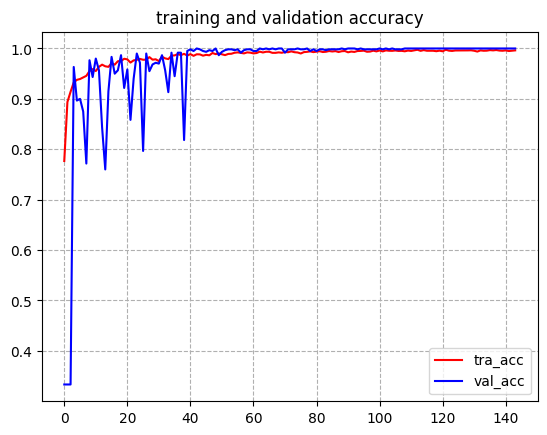

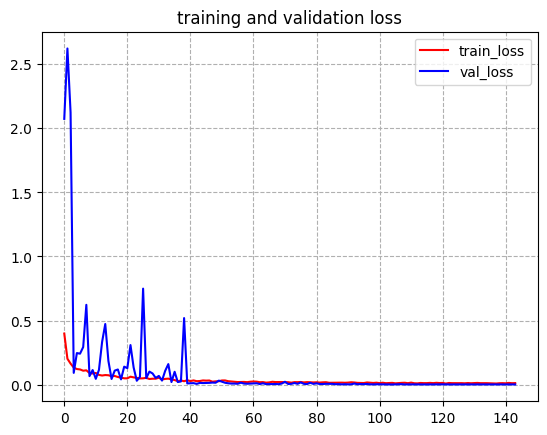

In [4]:
if __name__ == "__main__":
    history = cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/", 
                              epoch=300, 
                              save_model_name = './trained_model/pc_book_phone_0904.h5' )
    visual_train(history)

In [2]:
from keras.preprocessing.image import ImageDataGenerator

data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/"
test_data_path = data_path + "val"
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(test_data_path,
                                                                  target_size=(120, 160),
                                                                  color_mode="grayscale",
                                                                  class_mode='categorical')
print(validation_generator.class_indices)

Found 600 images belonging to 3 classes.
{'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}
